# HASOC German Data Visualisation

This notebook contains the visualisations of German data in HASOC 2019.

In [1]:
import pandas as pd

full = pd.read_csv("data/german_dataset.tsv", sep='\t')
full[:10]

text_id                                               text task_1  \
0   hasoc_de_1  Frank Rennicke – Ich bin stolz https://t.co/Cm...    NOT   
1   hasoc_de_2  ANSEHEN.....und danach bitte TEILEN...TEILEN.....    NOT   
2   hasoc_de_3  #Koeln Mohamed erkennt kein deutsches Recht so...    NOT   
3   hasoc_de_4  #SaudiArabien ist eine brutale islamische Dikt...    NOT   
4   hasoc_de_5  Bundespolizei #München hat im 1. Quartal 2019 ...    NOT   
5   hasoc_de_6  #1EuropaFuerAlle oder wie es die #SPD heute no...    NOT   
6   hasoc_de_7  #Hannover: Weil ihm die Freizeitgestaltung und...    NOT   
7   hasoc_de_8  #Deutschland 2019: Ort für die #EU-Wahlparty d...    NOT   
8   hasoc_de_9  #Innsbruck: Tirolerin und Türke knacken 2018 z...    NOT   
9  hasoc_de_10  #Wien: Vier Nigerianer bestellen teils hochpre...    NOT   

  task_2  
0   NONE  
1   NONE  
2   NONE  
3   NONE  
4   NONE  
5   NONE  
6   NONE  
7   NONE  
8   NONE  
9   NONE

## Sub-task A
Sub-task A focus on Hate speech and Offensive language identification offered for English, German, Hindi. Sub-task A is coarse-grained binary classification in which participating system are required to classify tweets into two class, namely: Hate and Offensive (HOF) and Non- Hate and offensive (NOT).

* (NOT) Non Hate-Offensive - This post does not contain any Hate speech, offensive content.
* (HOF) Hate and Offensive - This post contains Hate, offensive, and profane content.

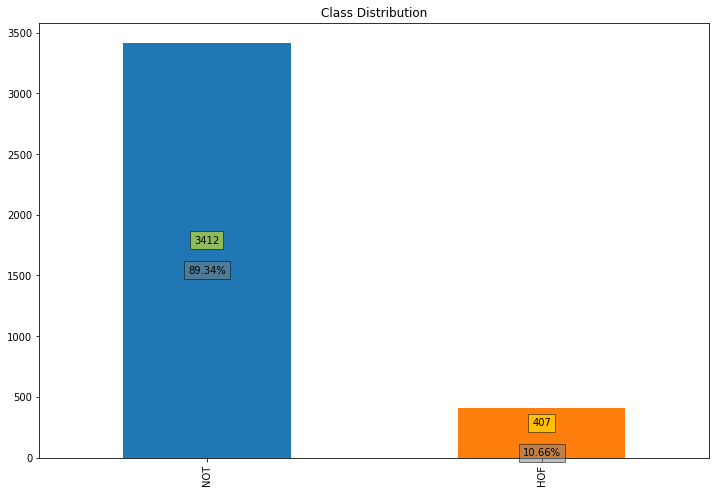

In [3]:
from visualisation import plot_data

plot_data(full, "task_1")

In [4]:
from preprocessing import remove_url

TEXT_COLUMN = "text"
full[TEXT_COLUMN] = full[TEXT_COLUMN].apply(lambda x: remove_url(x))

In [5]:
from visualisation import plot_word_cloud

NOT = full[(full['task_1'] == 'NOT')]
HOF = full[(full['task_1'] == 'HOF')]



word cloud for not offensive posts

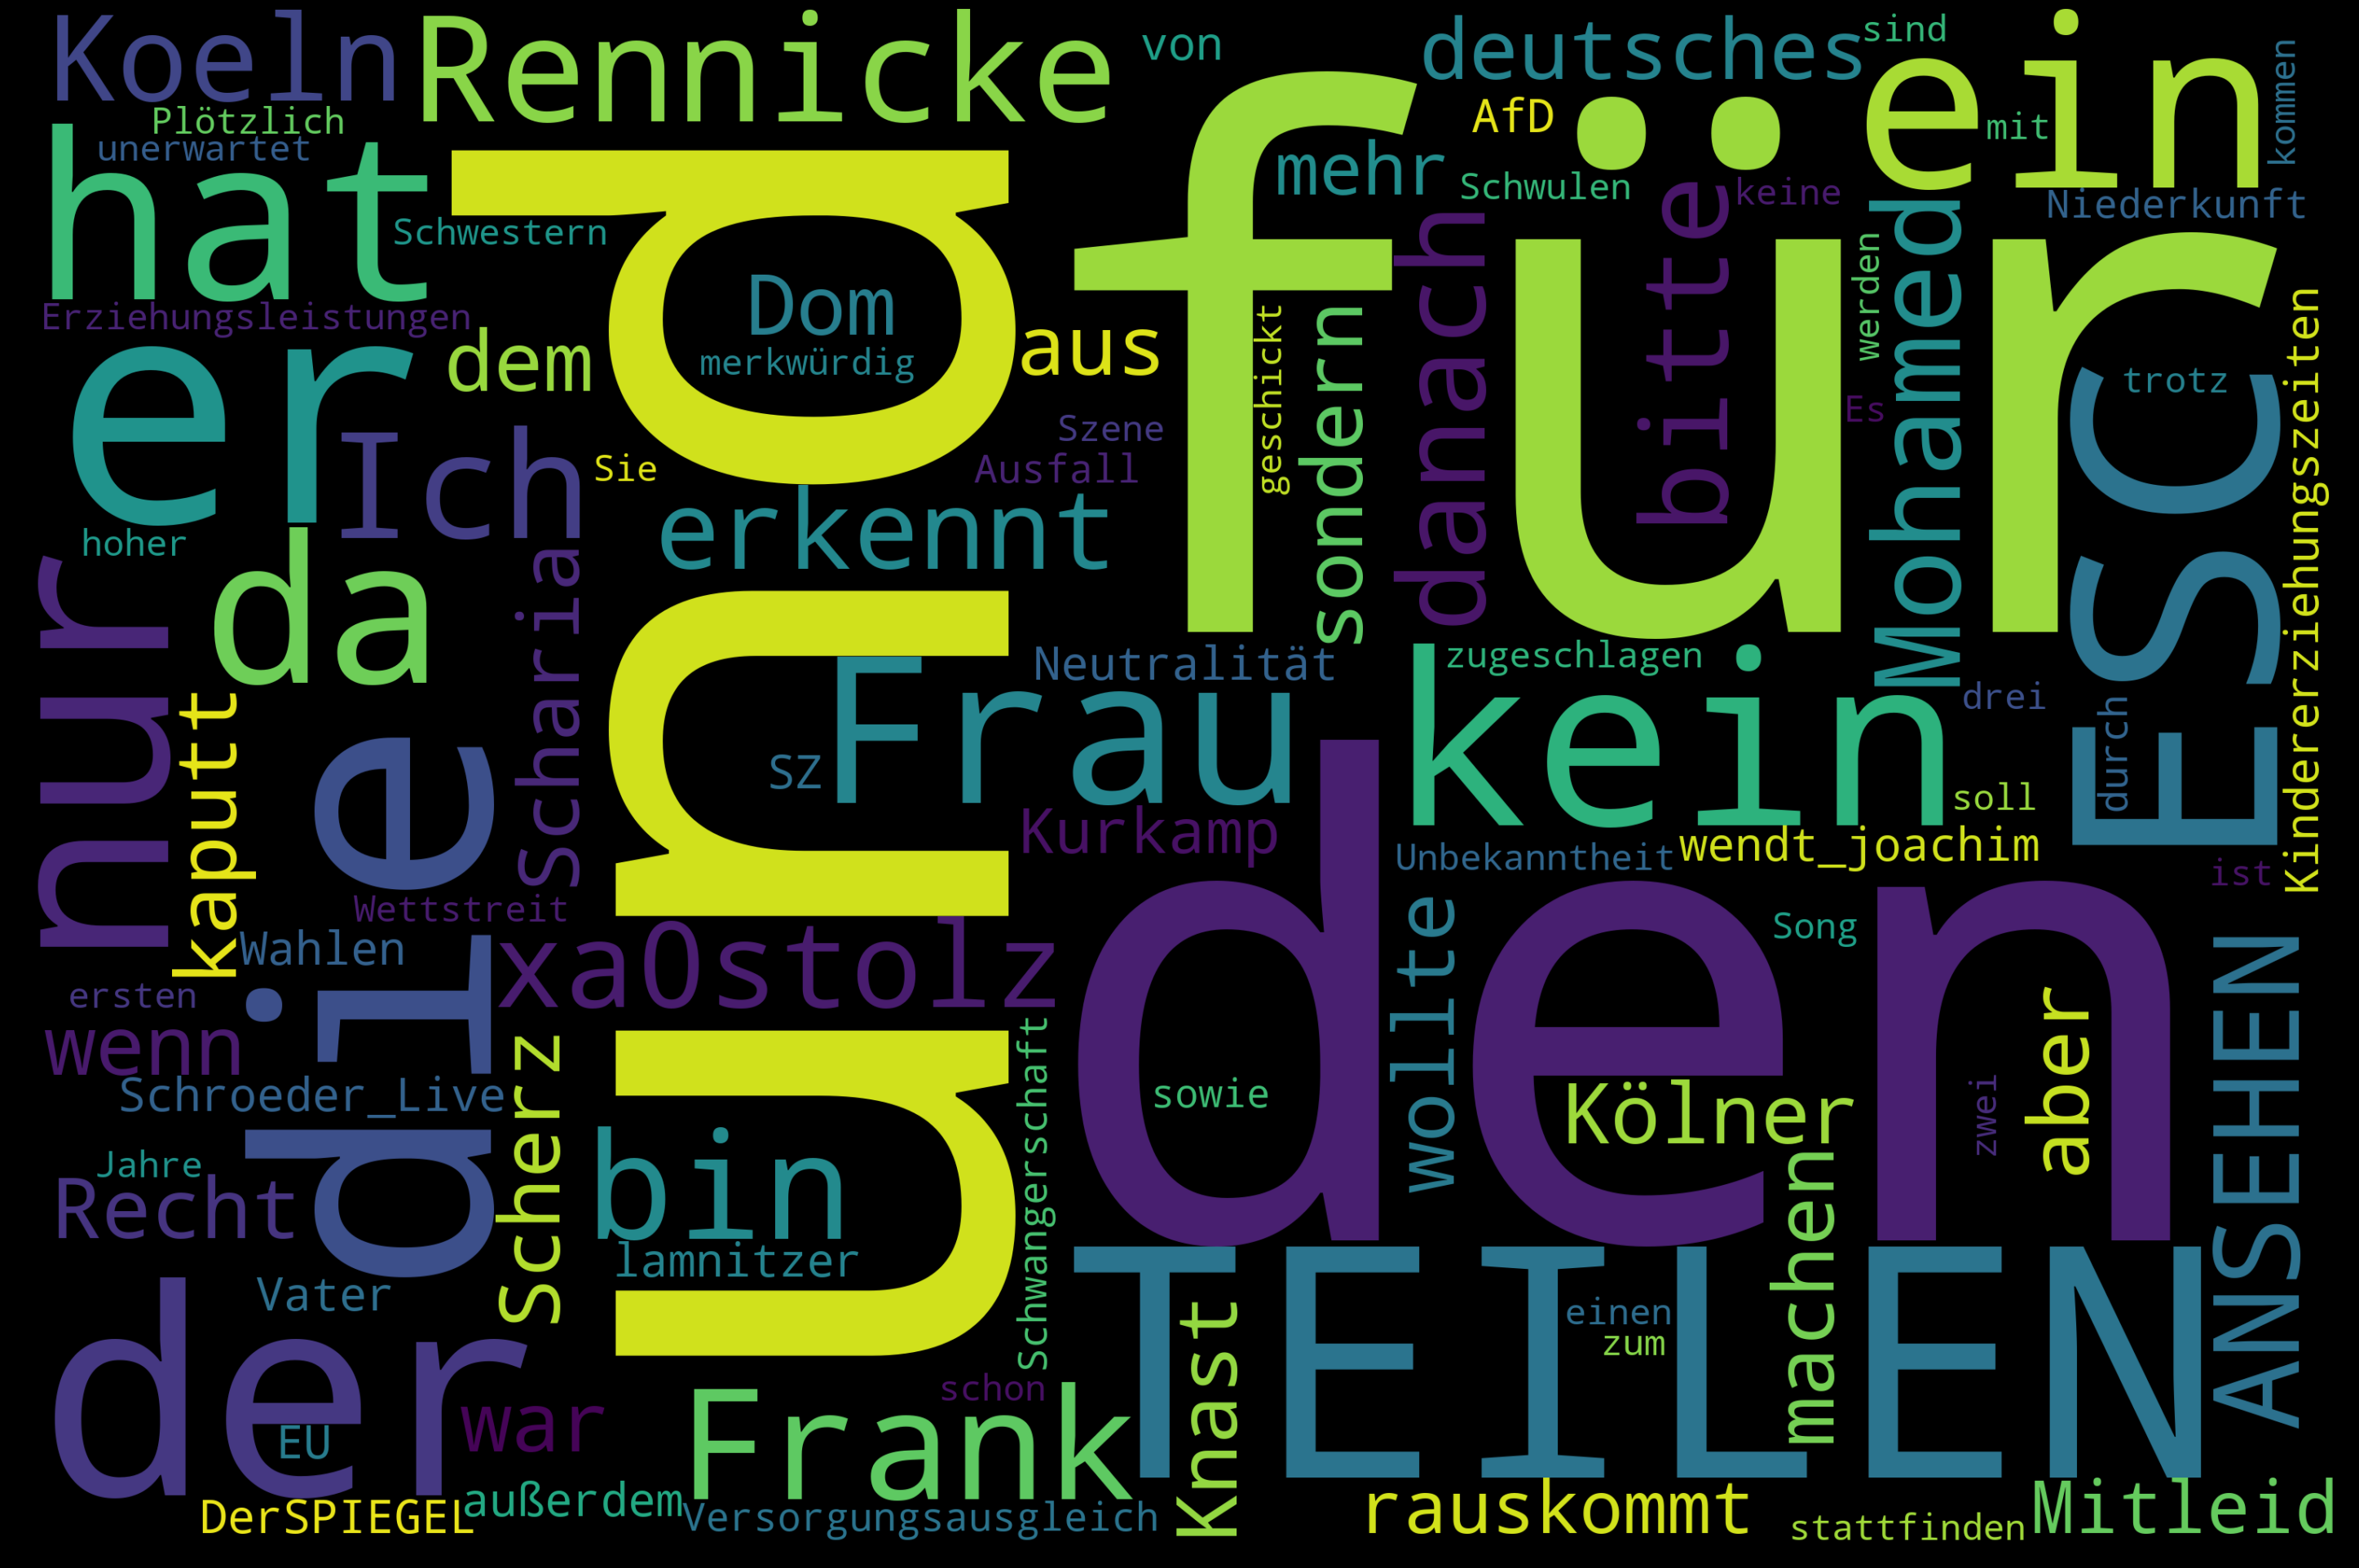

In [6]:
plot_word_cloud(NOT)

word cloud for offensive posts

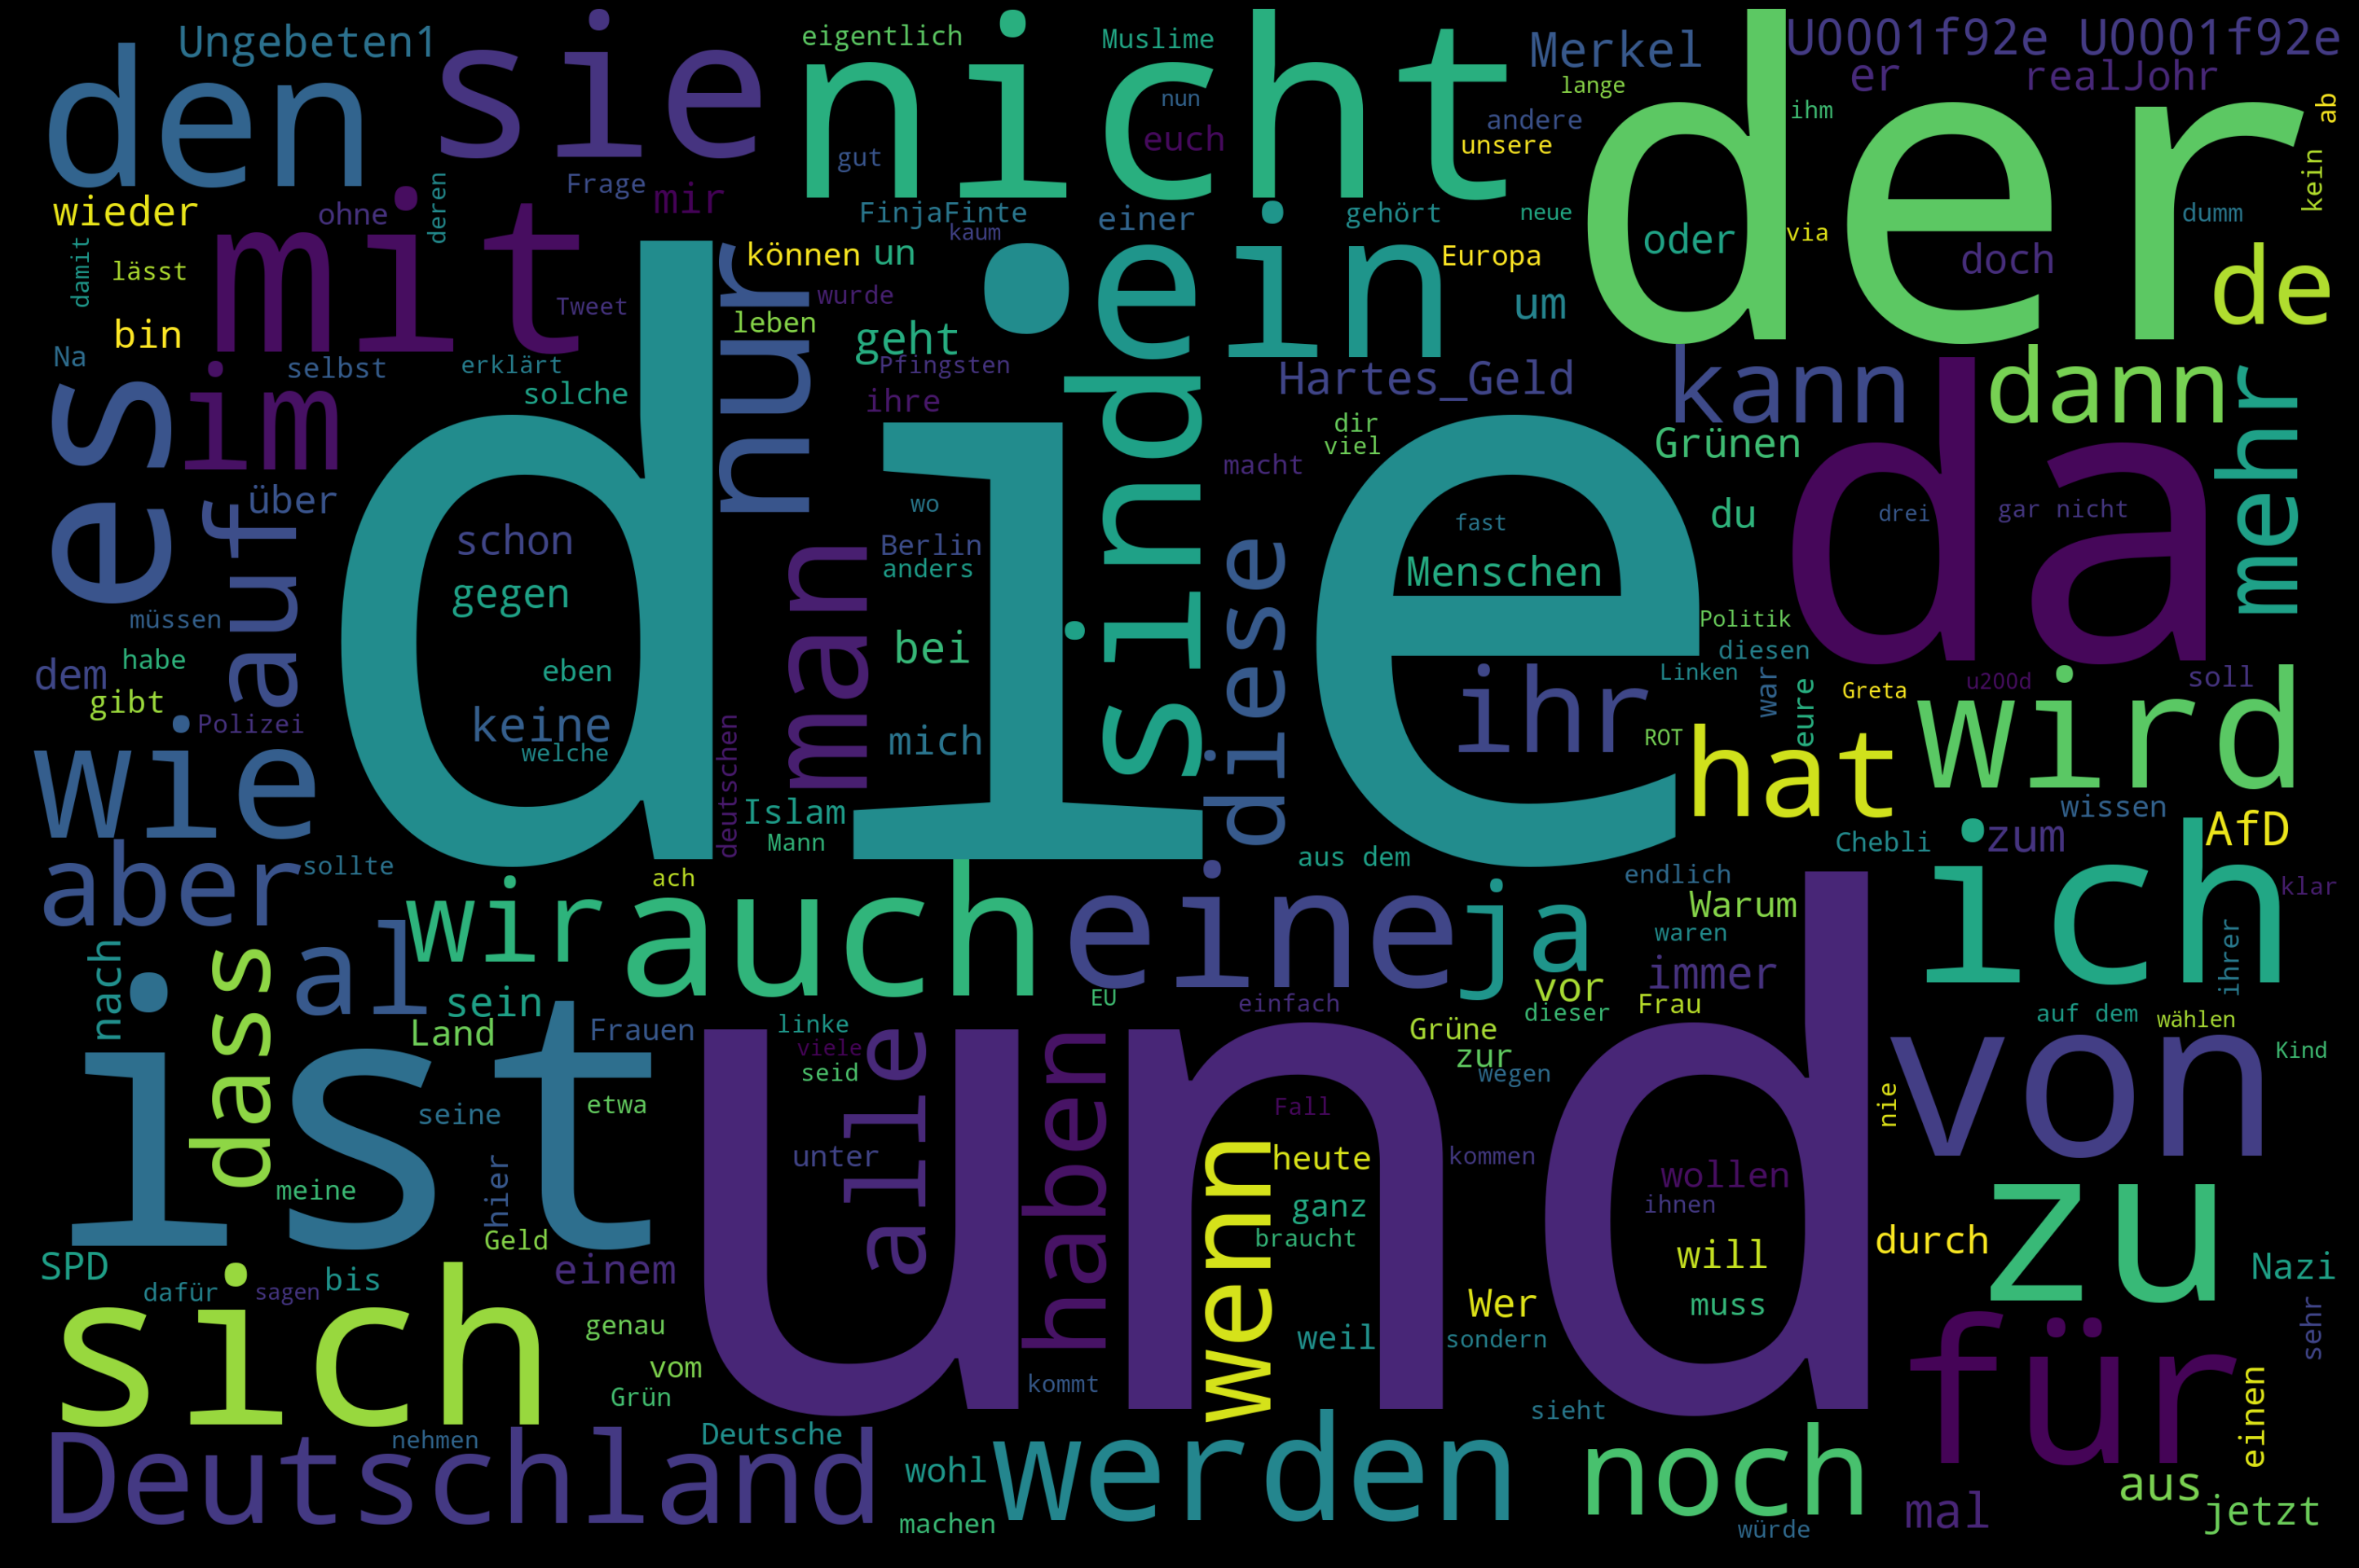

In [7]:
plot_word_cloud(HOF)

## Sub-task B :-
Sub-task B is a fine-grained classification. Hate-speech and offensive posts from the sub-task A are further classified into three categories.

* (HATE) Hate speech :- Posts under this class contain Hate speech content.
* (OFFN) Offenive :- Posts under this class contain offensive content.
* (PRFN) Profane :- These posts contain profane words.

In [8]:
is_hof = full['task_1'] == 'HOF'
hof = full[is_hof]
hof[:10]

text_id                                               text task_1  \
38    hasoc_de_39  💩👉'Cohn-Bendit ist kein altersverwirrter Spinn...    HOF   
66    hasoc_de_67  @ArasBacho Wer hat dem kriminellen Grapscher d...    HOF   
82    hasoc_de_83  Alfred Nobel würde sich im Grab rumdrehen.  Ei...    HOF   
96    hasoc_de_97  Das Schöne am Klimawandel: Damit lässt sich vo...    HOF   
98    hasoc_de_99  @lawyerberlin @Lebensformation ich nenne jeden...    HOF   
104  hasoc_de_105  @SaschaUlbrich @symptompanik @Mundaufmachen @A...    HOF   
114  hasoc_de_115  @JoanaCotar @Notabaris @Die_Gruenen @GoeringEc...    HOF   
116  hasoc_de_117  Von was träumt die Nachts? Ist ihr nicht bewuß...    HOF   
124  hasoc_de_125  Man muss sich einfach mal vergegenwärtigen, um...    HOF   
133  hasoc_de_134  @baerbeli04 @bernd471 Ich bin selbst aus dem W...    HOF   

    task_2  
38    OFFN  
66    OFFN  
82    OFFN  
96    OFFN  
98    OFFN  
104   HATE  
114   OFFN  
116   OFFN  
124   OFFN  
133   OFFN

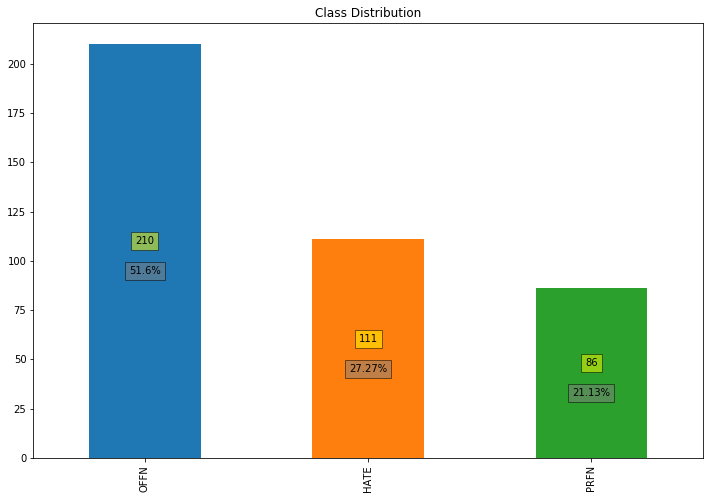

In [9]:
plot_data(hof, "task_2")

In [10]:
HATE = hof[(hof['task_2'] == 'HATE')]
PRFN = hof[(hof['task_2'] == 'PRFN')]
OFFN = hof[(hof['task_2'] == 'OFFN')]

word cloud for hate speech content

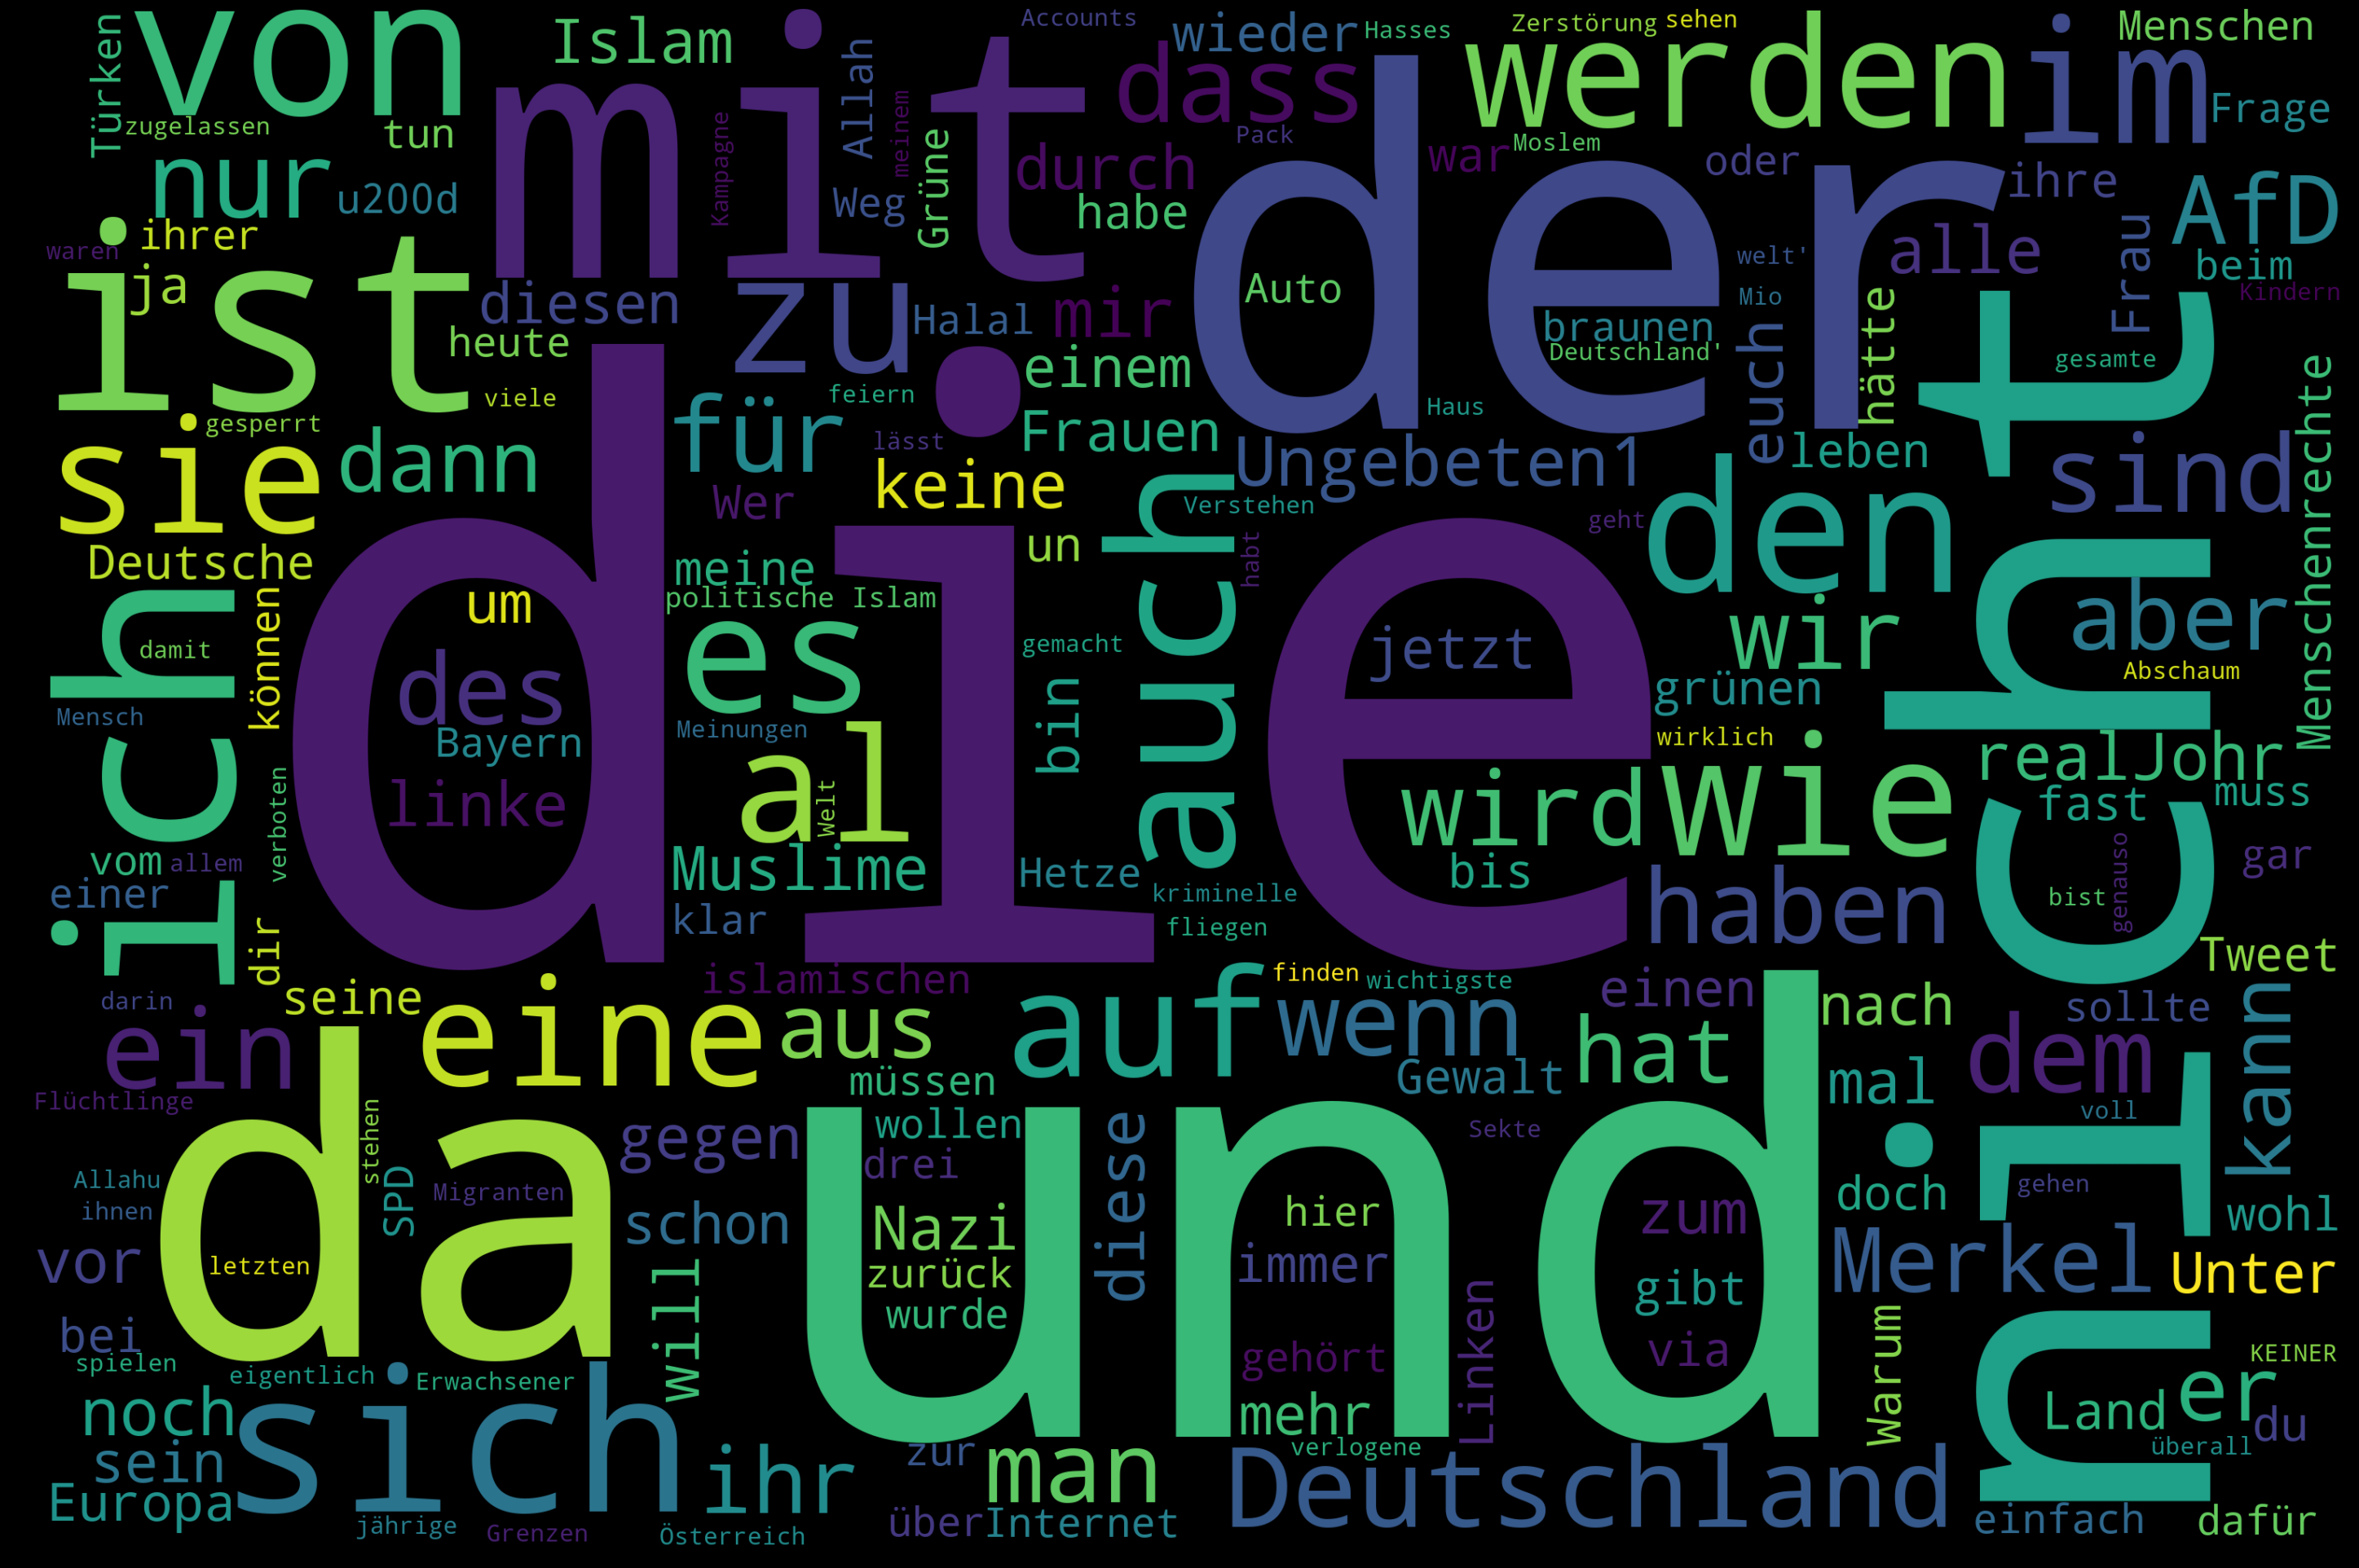

In [11]:
plot_word_cloud(HATE)

word cloud for profain content

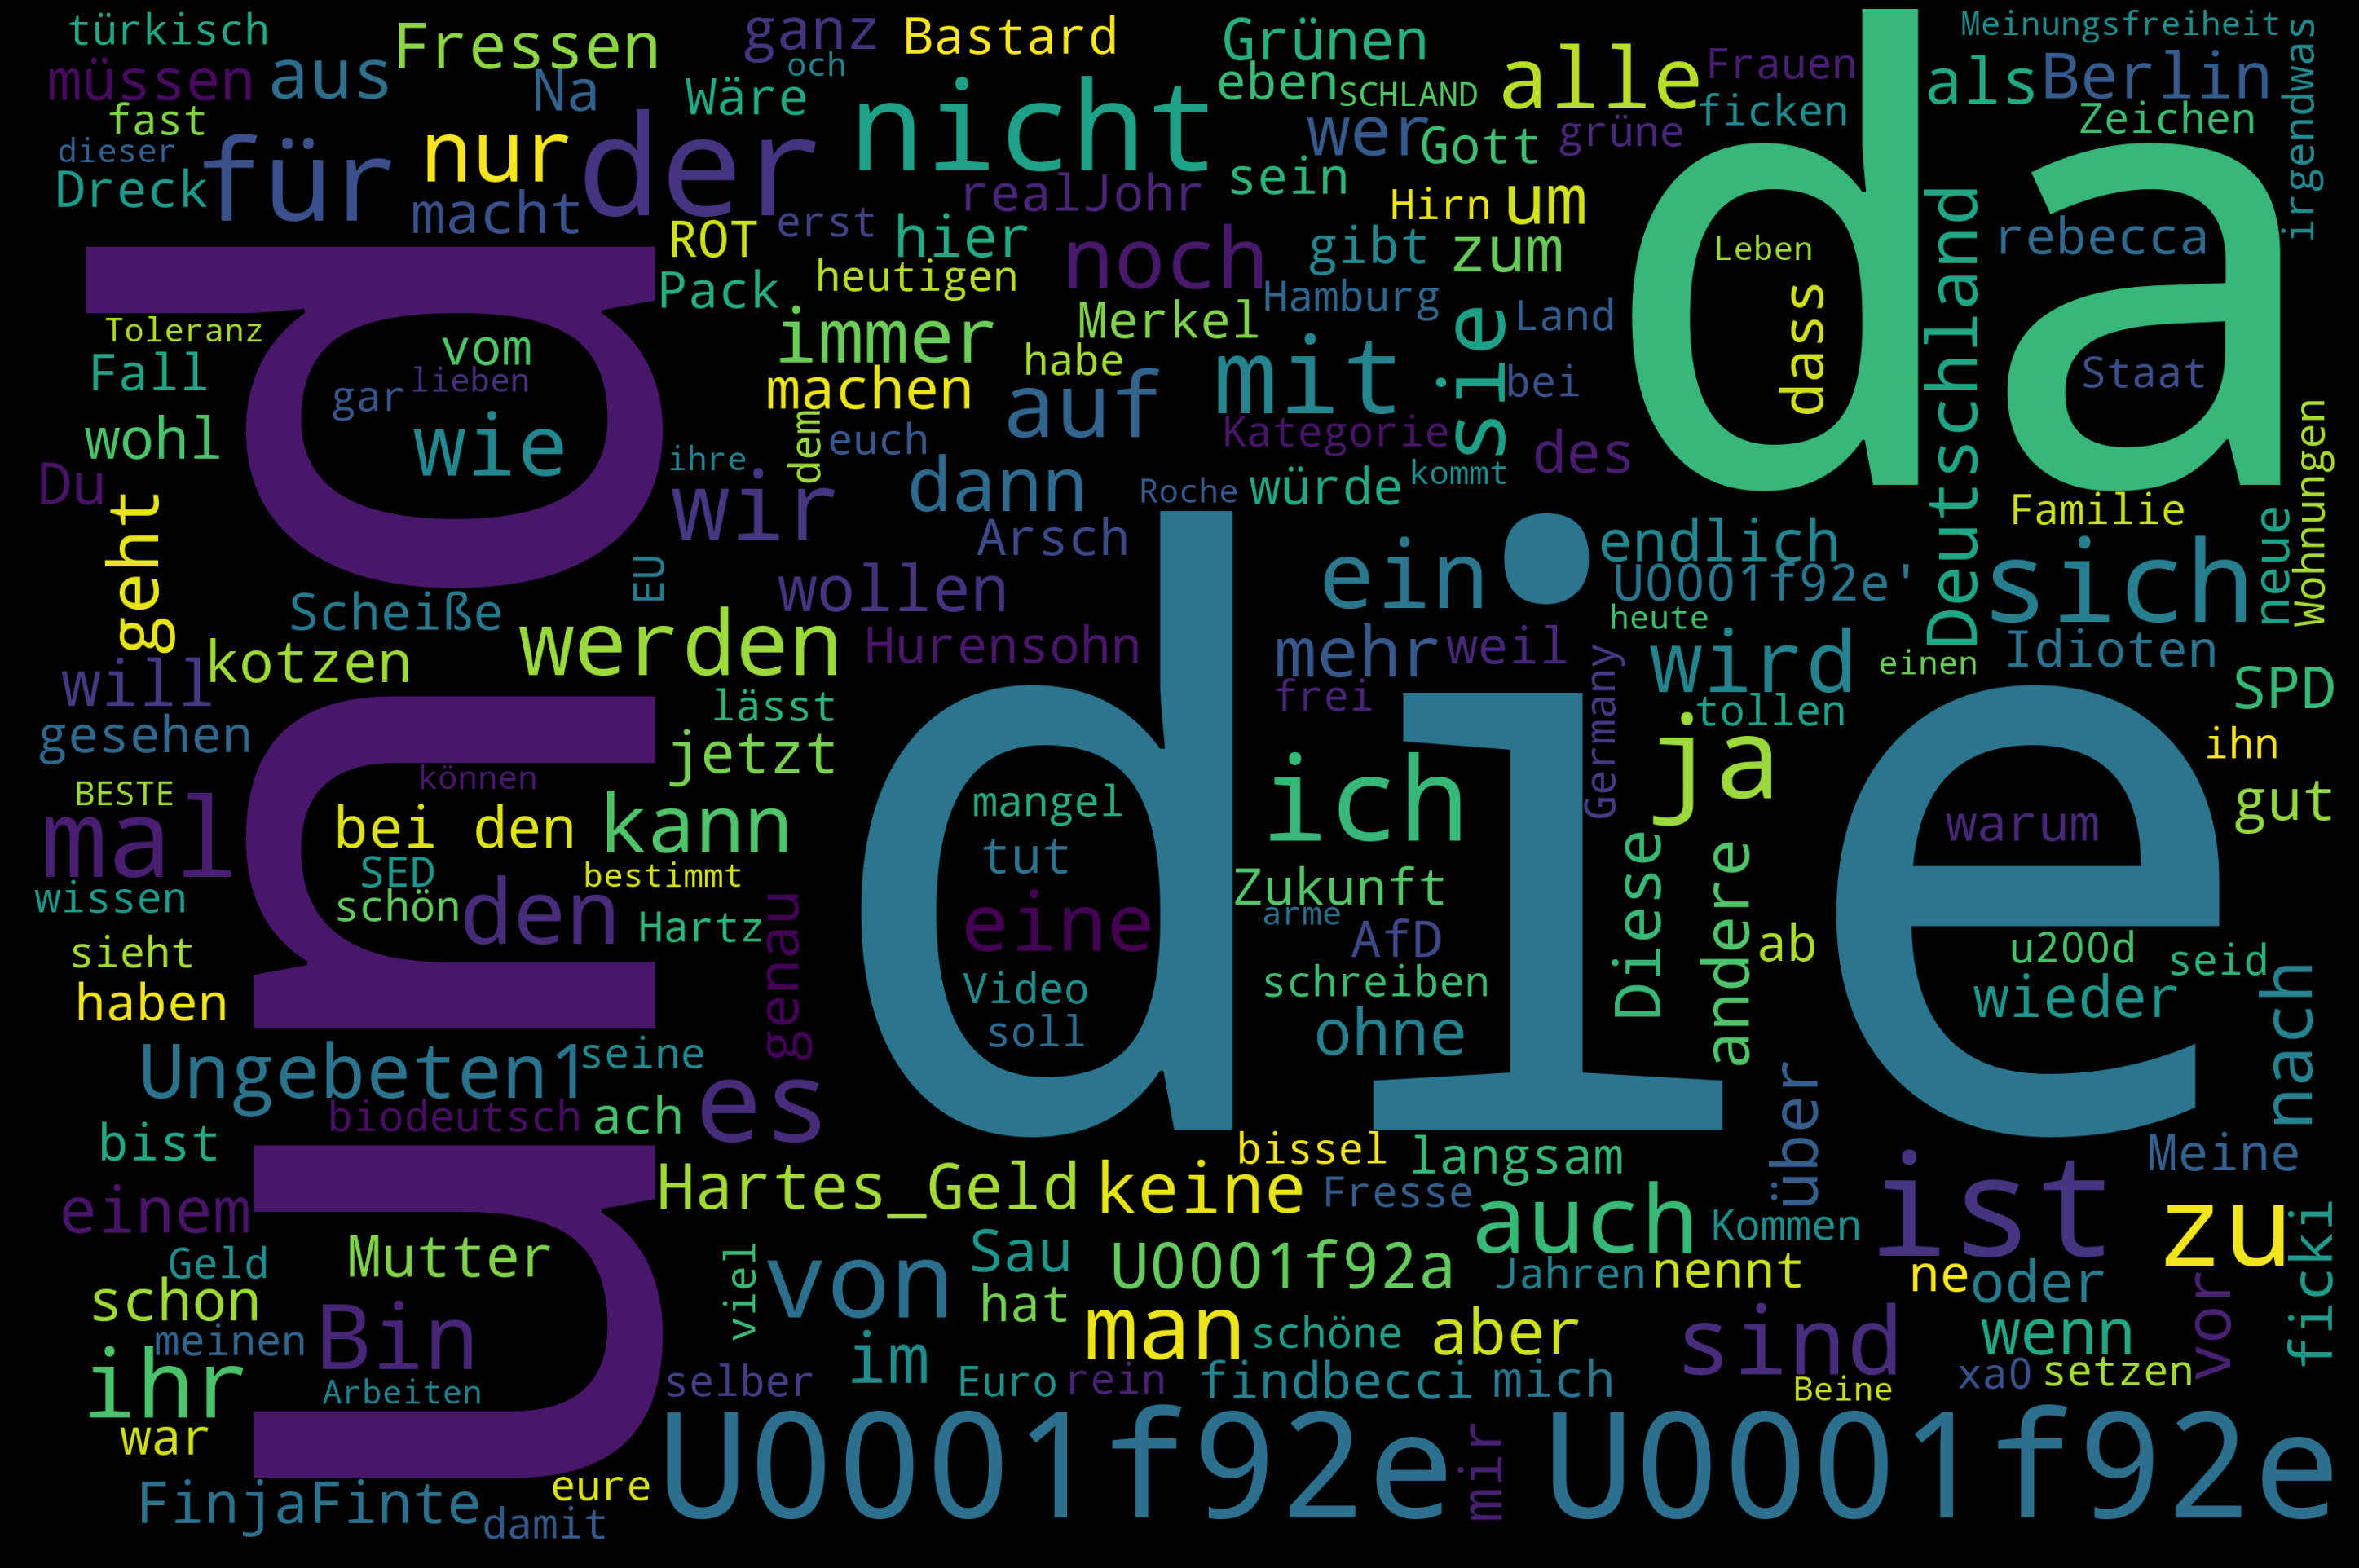

In [12]:
plot_word_cloud(PRFN)

word cloud for offensive content

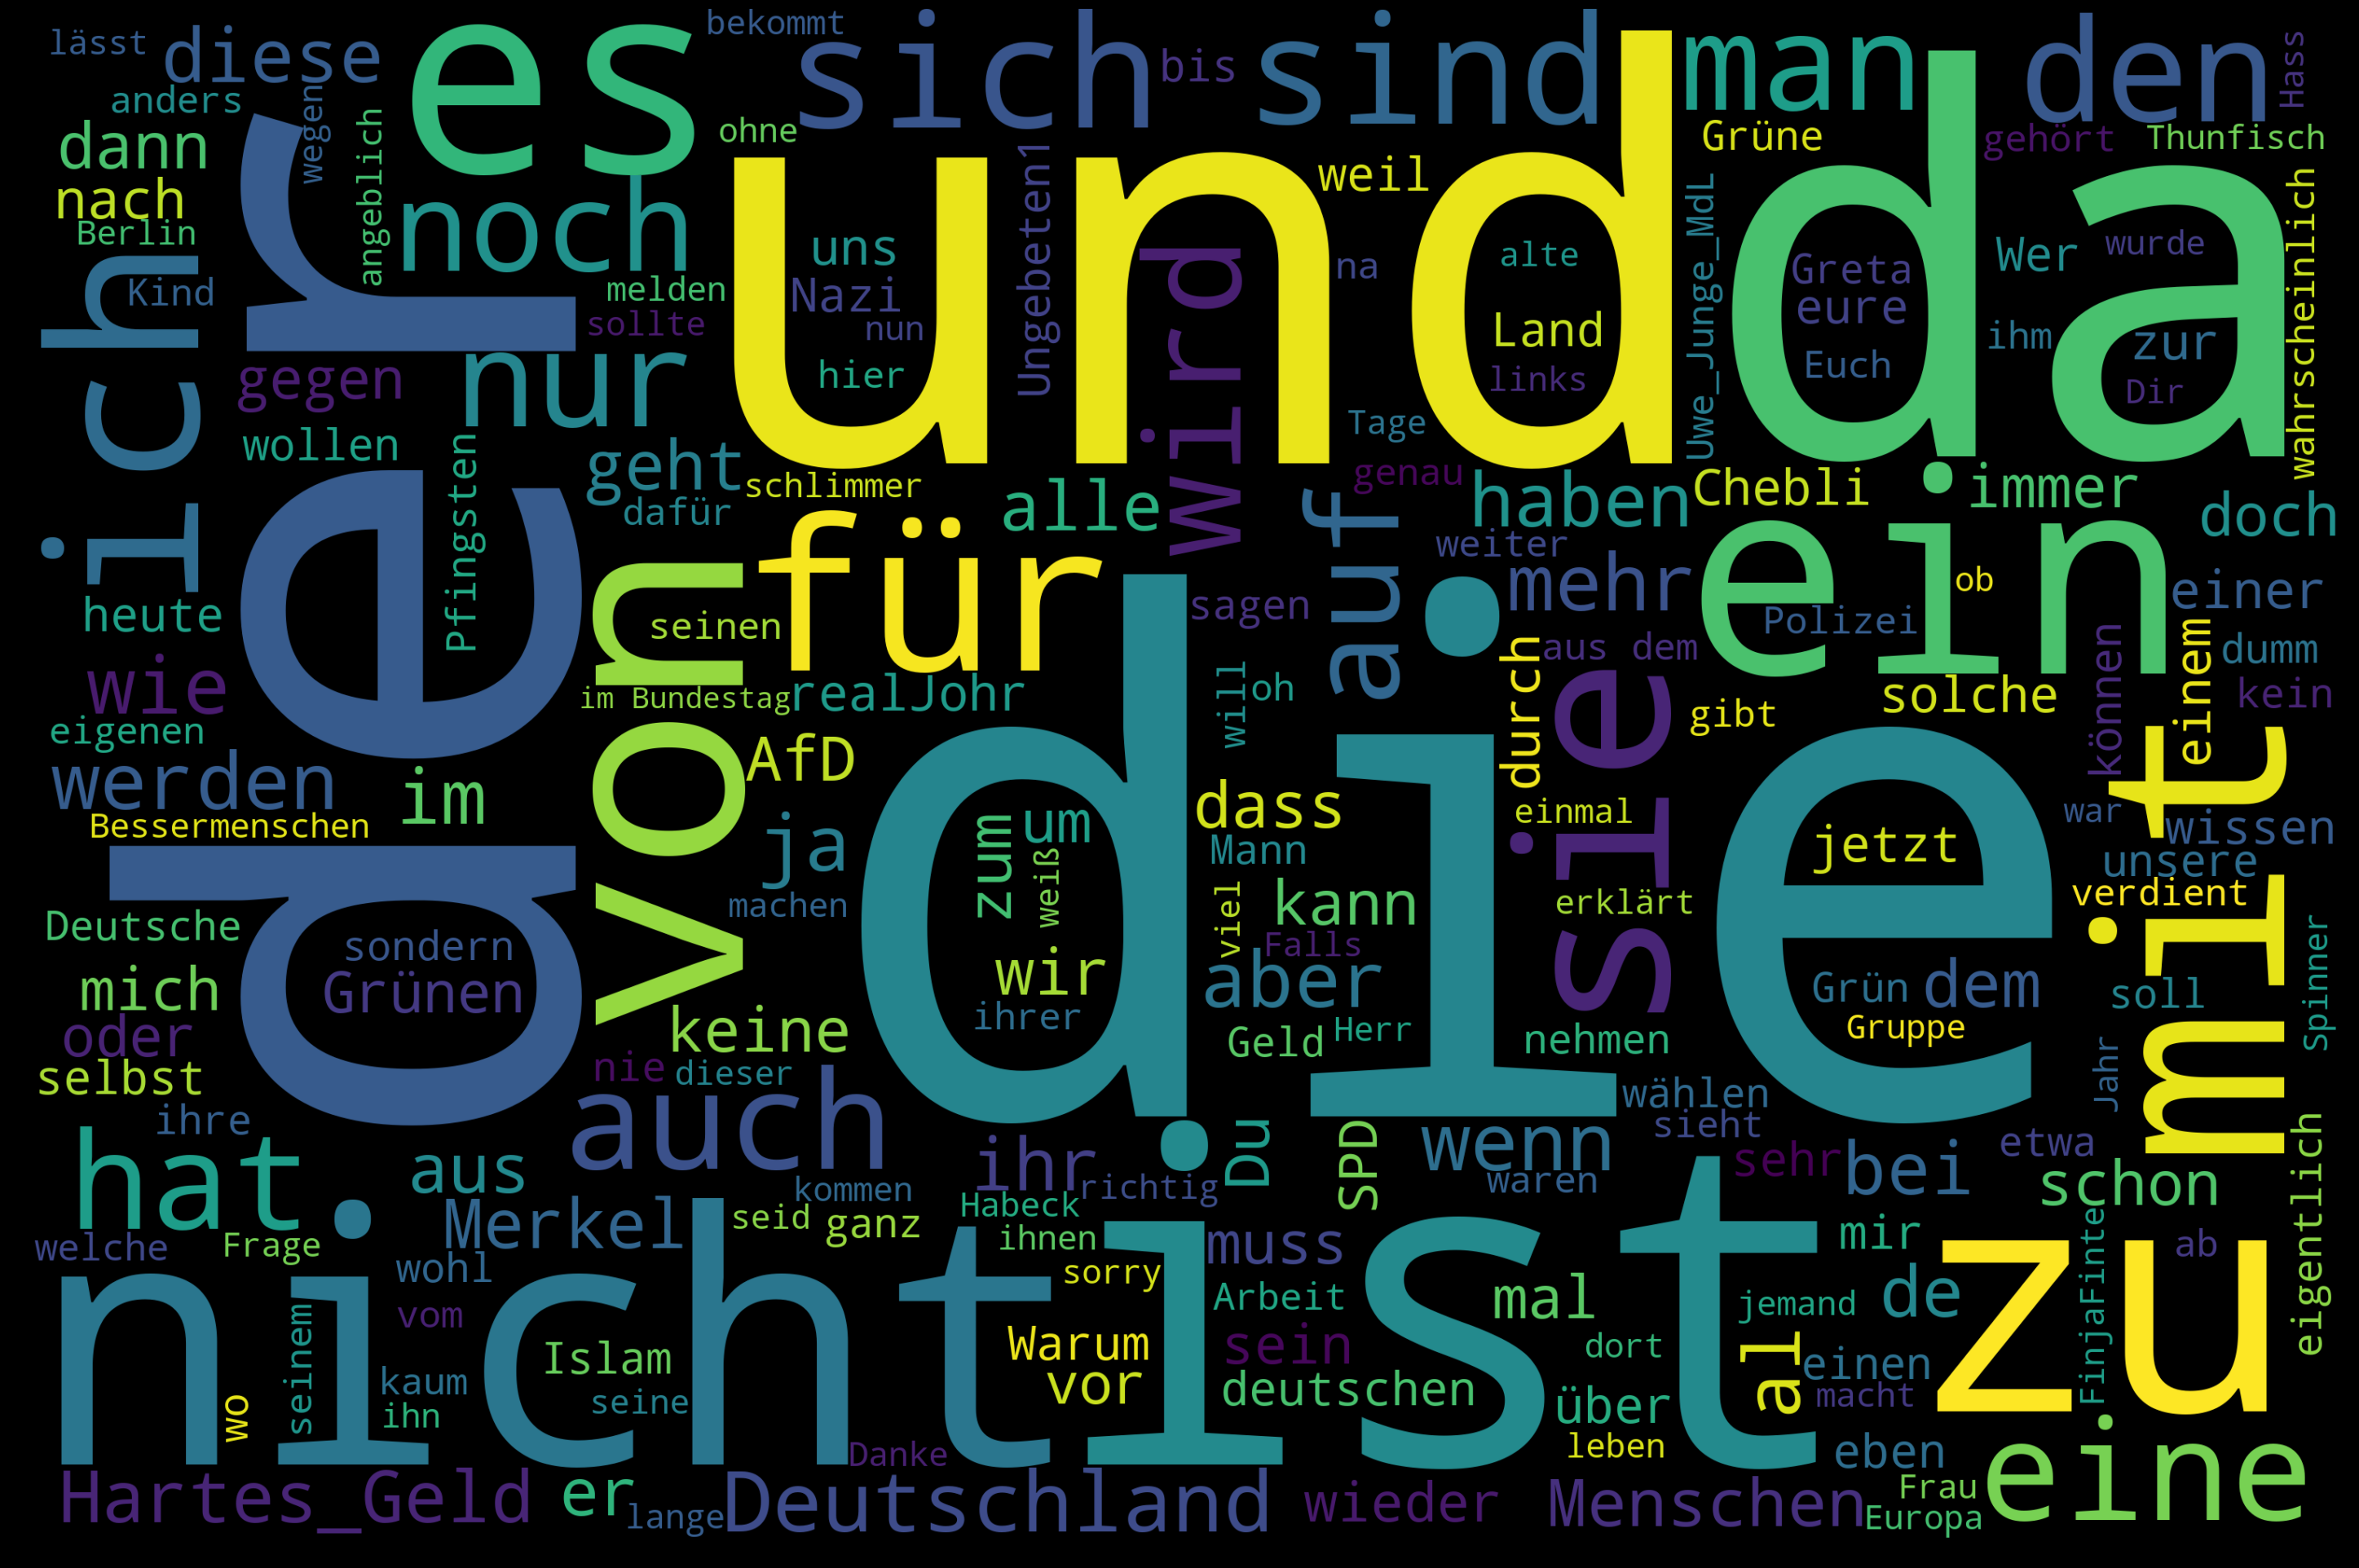

In [14]:
plot_word_cloud(OFFN)

## Sub-task C
Sub-task c will check the type of offense. Only posts labeled as HOF in sub-task A are included in sub-task C. The two categories in sub-task C are the following: 

* Targeted Insult (TIN): Posts containing an insult/threat to an individual, group, or others.
* Untargeted (UNT): Posts containing nontargeted profanity and swearing. Posts with general profanity are not targeted, but they contain non-acceptable language.

It was not available to German 